# Regression: Cardiovascular Disease Prediction Project

## Coronary heart disease (CHD) Modelling


The purpose of this  notebooke is to analyse the  Cardiovascular Disease dataset and create a logistic regression vpredicting 10 yeears  risk of coronary heard disease (CHD)

Data Description
Demographic:

- Sex: male or female("M" or "F")
- Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous) Behavioral
- Is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
- Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.) Medical( history)
- BP Meds: whether or not the patient was on blood pressure medication (Nominal)
- Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
- Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
- Diabetes: whether or not the patient had diabetes (Nominal) Medical(current)
- Tot Chol: total cholesterol level (Continuous)
Sys BP: systolic blood pressure (Continuous)
Dia BP: diastolic blood pressure (Continuous)
- BMI: Body Mass Index (Continuous)
- Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
- Glucose: glucose level (Continuous) Predict variable (desired target)
- 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) - DV

Data loading and cleaning
EDA
Modelling


In [68]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV


In [47]:
train_data= pd.read_csv('/content/train.csv',index_col= 0)
train_data

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1


In [48]:
# Display basic information about the dataset
print(train_data.info())

# Show the first few rows of the dataset
print(train_data.head())

# Get a summary of statistics for numerical features
print(train_data.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 450.2+ KB
None
 

In [49]:
print(train_data.isnull().sum())


age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64


Drop education column

In [50]:
train_data = train_data.drop(columns=['education'])


In [51]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,3390.0,49.542183,8.592878,32.00,42.00,49.00,56.00,70.0
cigsPerDay,3368.0,9.069477,11.879078,0.00,0.00,0.00,20.00,70.0
BPMeds,3346.0,0.029886,0.170299,0.00,0.00,0.00,0.00,1.0
prevalentStroke,3390.0,0.006490,0.080309,0.00,0.00,0.00,0.00,1.0
prevalentHyp,3390.0,0.315339,0.464719,0.00,0.00,0.00,1.00,1.0
diabetes,3390.0,0.025664,0.158153,0.00,0.00,0.00,0.00,1.0
totChol,3352.0,237.074284,45.247430,107.00,206.00,234.00,264.00,696.0
sysBP,3390.0,132.601180,22.292030,83.50,117.00,128.50,144.00,295.0
diaBP,3390.0,82.883038,12.023581,48.00,74.50,82.00,90.00,142.5
BMI,3376.0,25.794964,4.115449,15.96,23.02,25.38,28.04,56.8


# Univariate Analysis
For Numerical Variables

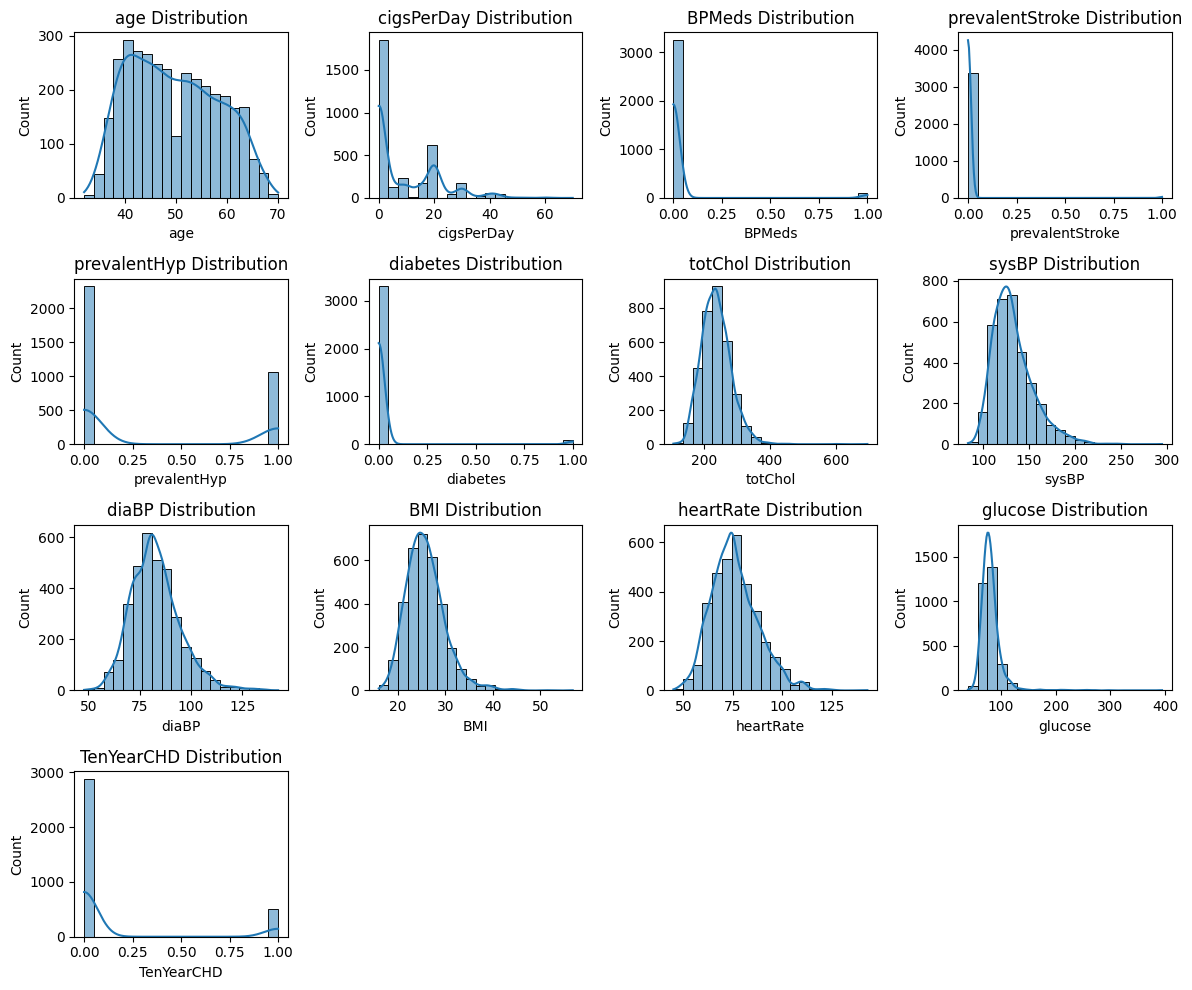

In [52]:
# Plot distribution for numerical variables
numerical_cols = train_data.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)
    sns.histplot(train_data[col], kde=True, bins=20)
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()


For Categorical Variables

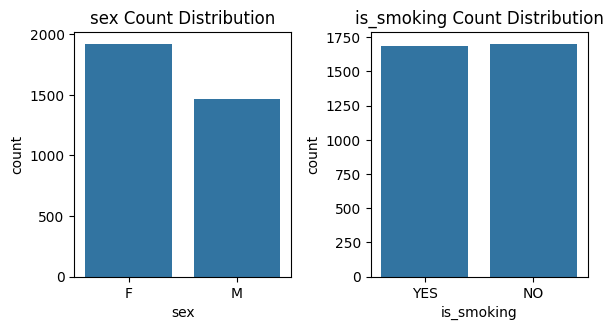

In [53]:
# Plot distribution for categorical variables
categorical_cols = train_data.select_dtypes(include=['object', 'bool']).columns

plt.figure(figsize=(12, 6))
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 4, i+1)
    sns.countplot(x=train_data[col])
    plt.title(f'{col} Count Distribution')
plt.tight_layout()
plt.show()


# Imputation for Continuous Variables (cigsPerDay, totChol, BMI, heartRate, glucose):
For continuous variables, SimpleImputer(strategy='median') is used to replace missing values with the median value of each column. This is a robust approach since the median is less sensitive to outliers compared to the mean

Imputation for Categorical Variables (BPMeds)
most frequent value (mode) using SimpleImputer(strategy='most_frequent'). This is because mode imputation is a common approach for categorical features where you want to preserve the dominant category.

IterativeImputer is then used on the same continuous variables to fill in the missing values. It performs a more complex imputation by iteratively estimating the missing values, considering other variables in the dataset.

In [54]:
# 1. Categorical Imputation
mode_imputer = SimpleImputer(strategy='most_frequent')
train_data['BPMeds'] = mode_imputer.fit_transform(train_data[['BPMeds']])

# 2. Continuous Imputation
mean_median_imputer = SimpleImputer(strategy='median')  # Use 'mean' or 'median'
continuous_vars = ['cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose']
train_data[continuous_vars] = mean_median_imputer.fit_transform(train_data[continuous_vars])

# 3. Iterative Imputation for Better Estimation
iterative_imputer = IterativeImputer(max_iter=10, random_state=0)
train_data[continuous_vars] = iterative_imputer.fit_transform(train_data[continuous_vars])

# Check if any missing values remain
print(train_data.isnull().sum())


age                0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


In [55]:
train_data

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,
0,64,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1


# Getting dummies

In [56]:

# Replace 'sex' column: 'M' -> 1, 'F' -> 0
train_data['sex'] = train_data['sex'].map({'M': 1, 'F': 0})

# Replace 'is_smoking' column: 'YES' -> 1, 'NO' -> 0
train_data['is_smoking'] = train_data['is_smoking'].map({'YES': 1, 'NO': 0})

# Check the result to ensure proper encoding
print(train_data.head())


    age sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  \
id                                                                          
0    64   F        YES         3.0     0.0                0             0   
1    36   M         NO         0.0     0.0                0             1   
2    46   F        YES        10.0     0.0                0             0   
3    50   M        YES        20.0     0.0                0             1   
4    64   F        YES        30.0     0.0                0             0   

    diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  TenYearCHD  
id                                                                          
0          0    221.0  148.0   85.0  25.38       90.0     80.0           1  
1          0    212.0  168.0   98.0  29.77       72.0     75.0           0  
2          0    250.0  116.0   71.0  20.35       88.0     94.0           0  
3          0    233.0  158.0   88.0  28.26       68.0     94.0           1 

# Explatory data Analysis

In [57]:
# For each column, print the value counts
for column in train_data.columns:
    print(f"Value counts for {column}:")
    print(train_data[column].value_counts())
    print("\n")


Value counts for age:
age
40    148
42    145
41    144
46    140
39    139
44    135
48    134
45    131
43    127
38    119
52    118
55    116
50    115
53    114
51    114
47    108
54    107
49    104
57     97
58     95
60     95
63     93
59     93
56     92
61     87
62     80
64     75
36     75
37     73
65     43
67     33
66     30
35     29
34     16
68     14
69      5
33      4
70      2
32      1
Name: count, dtype: int64


Value counts for sex:
sex
0    1923
1    1467
Name: count, dtype: int64


Value counts for is_smoking:
is_smoking
0    1703
1    1687
Name: count, dtype: int64


Value counts for cigsPerDay:
cigsPerDay
0.0     1725
20.0     606
30.0     176
15.0     172
10.0     106
9.0      104
5.0      103
3.0       79
40.0      62
1.0       48
25.0      44
43.0      42
35.0      17
2.0       17
6.0       14
8.0       10
7.0        8
60.0       8
18.0       7
4.0        7
50.0       6
17.0       5
23.0       5
11.0       4
12.0       3
13.0       3
19.0       2
16.

In [58]:
train_data['BPMeds'].value_counts()

,count
BPMeds,
0.0,3290
1.0,100


train_data['BPMeds'].value_counts()

# Target Variable vs. Numerical Features
To analyze how the numerical features are related to the target variable (TenYearCHD), you can plot boxplots:

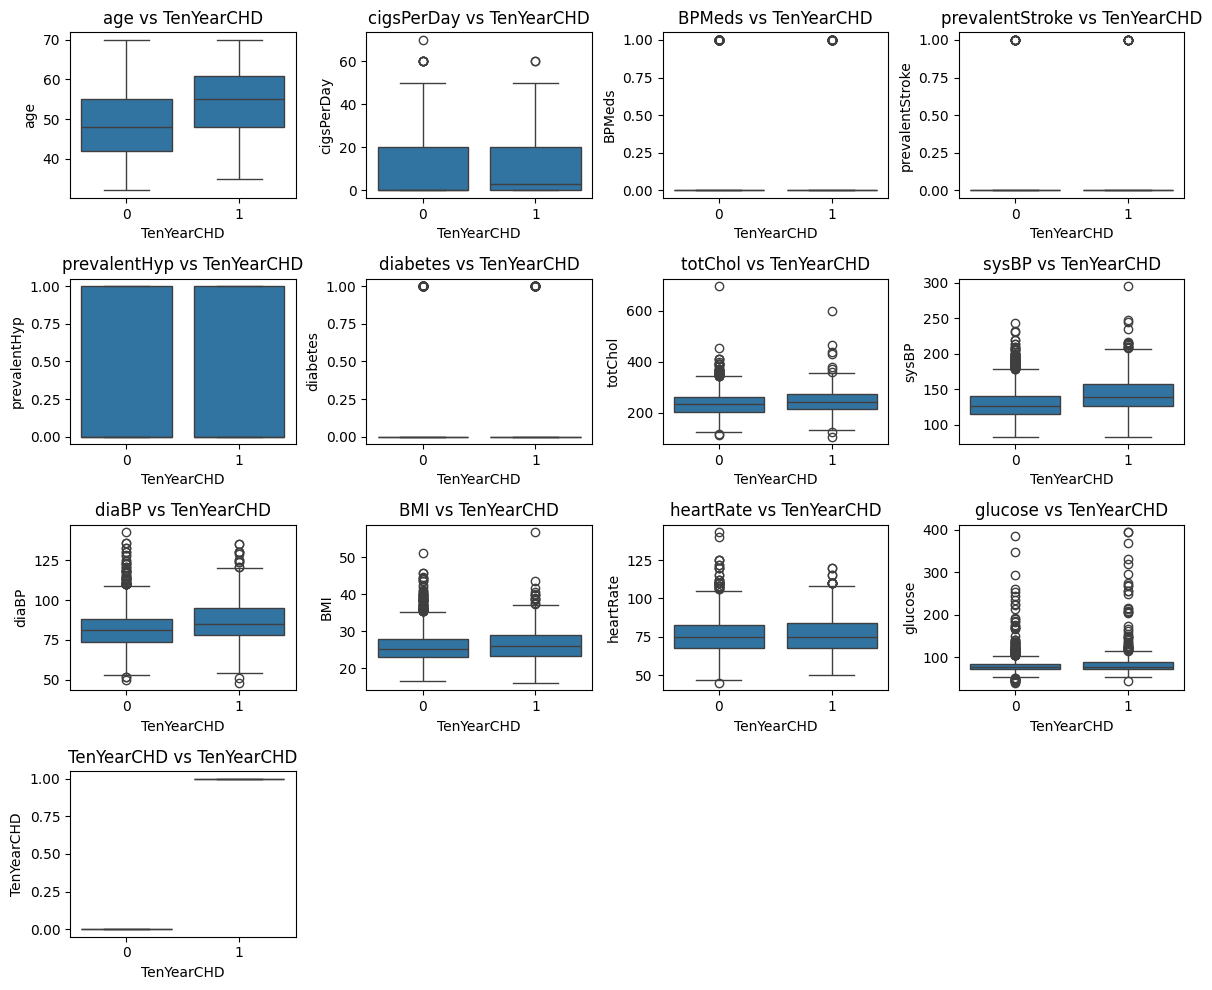

In [59]:
# Plot boxplots for numerical features against the target variable
plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)
    sns.boxplot(x=train_data['TenYearCHD'], y=train_data[col])
    plt.title(f'{col} vs TenYearCHD')
plt.tight_layout()
plt.show()


Splitting the data into features and labels.
Transforming the categorical features (create dummy variables).
Splitting the data into training and testing sets.

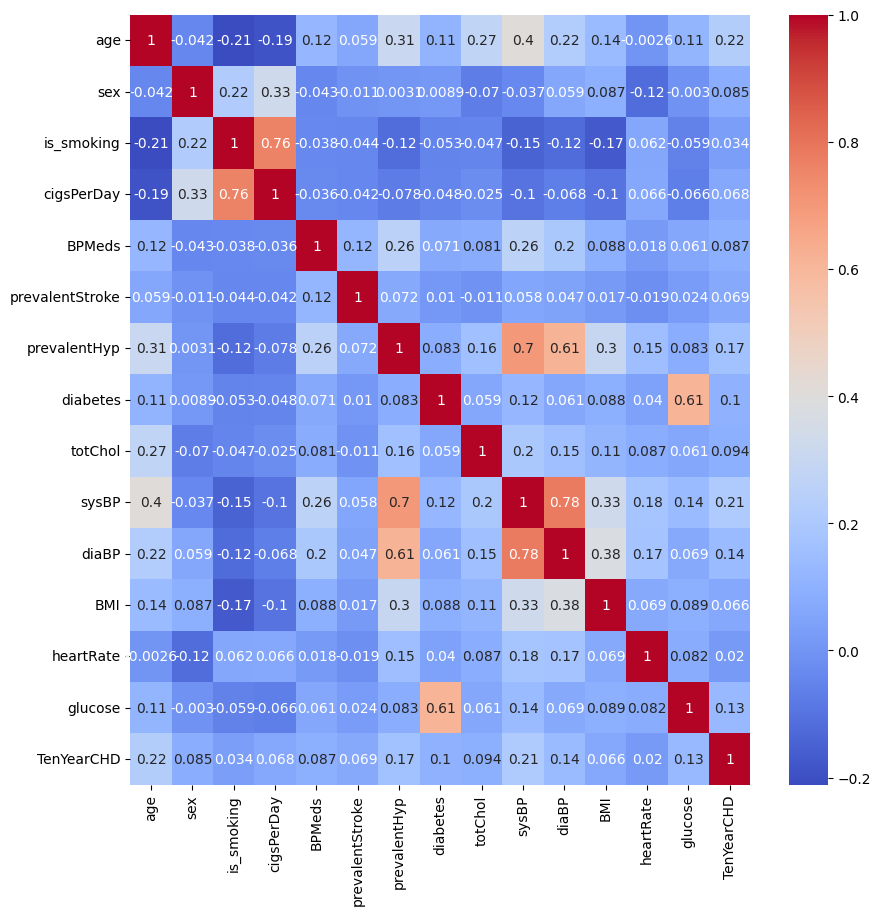

In [60]:
# Correlation heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [61]:
# selecting  features based  on domain knowledge and correlation.
Selected_features = ['age', 'sex','cigsPerDay', 'totChol', 'sysBP', 'is_smoking', 'glucose','prevalentHyp']

Feature selection for machine learning models: High positive or negative correlations (indicated by red or blue colours, respectively) suggest that two features have a linear relationship. When features are highly correlated with one another (multicollinearity), it can be redundant to use all of them in a machine learning model. This information can be used to select a subset of features that provides the most information, which can improve the model's performance and reduce overfitting.

Understanding data structure and relationships: Correlations can reveal the underlying structure of the data.

# Data splitting and Preprocessing

In [65]:
X = train_data[Selected_features]
y = train_data['TenYearCHD']  # Target variable


Spliiting The data using 20/80 Rule

In [66]:
#Split the training data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Ensures class proportions are similar in train and test sets
)


In [69]:
# Step 2: Normalise the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Train a logistic regression model on the training data
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [70]:
model.intercept_[0]

-1.999797705844963

In [71]:
coeff_df = pd.DataFrame(model.coef_.T, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
age,0.488716
sex,0.259057
cigsPerDay,0.235117
totChol,0.108916
sysBP,0.351717
is_smoking,0.081957
glucose,0.214734
prevalentHyp,0.107007



# Model accuracy assessment:
First, we assess the model's accuracy on the test set, which will give us a baseline understanding of its performance. Given the class imbalance noted during the EDA, we acknowledge that accuracy alone may not be the best measure of performance. Nevertheless, it provides a quick indication of overall effectiveness.

# Advanced performance metrics:
 A confusion matrix and classification report will provide a more nuanced view of the model's performance, including metrics like precision, recall, and F1 score. These are crucial in the medical field where the cost of false negatives could be significantly higher than false positives.

In [72]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate accuracy on test data
accuracy = accuracy_score(y_test, model.predict(X_test_scaled))
print(f"Model accuracy: {accuracy}")

# Generate confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, model.predict(X_test_scaled))
class_report = classification_report(y_test, model.predict(X_test_scaled))
print(f"Confusion Matrix:\n{conf_matrix}\n")
print(f"Classification Report:\n{class_report}")

# Interpret model coefficients
coeff_df = pd.DataFrame(model.coef_.T, X.columns, columns=['Coefficient'])
coeff_df


Model accuracy: 0.8539823008849557
Confusion Matrix:
[[574   2]
 [ 97   5]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       576
           1       0.71      0.05      0.09       102

    accuracy                           0.85       678
   macro avg       0.78      0.52      0.51       678
weighted avg       0.83      0.85      0.80       678



,Coefficient
age,0.488716
sex,0.259057
cigsPerDay,0.235117
totChol,0.108916
sysBP,0.351717
is_smoking,0.081957
glucose,0.214734
prevalentHyp,0.107007


## Model Accuracy:
Accuracy is the proportion of correct predictions made by the model. In this case, the accuracy is approximately 0.86, meaning the model correctly predicted the outcome for about 86% of the test cases.

True Negatives (TN): 574

These are the instances where the model correctly predicted the negative class (class 0).
False Positives (FP): 0

These are the instances where the model incorrectly predicted the positive class (class 1), when the true class was actually negative (class 0).
False Negatives (FN):97

These are the instances where the model incorrectly predicted the negative class (class 0), when the true class was actually positive (class 1).
True Positives (TP): 5

These are the instances where the model correctly predicted the positive class (class 12).

In [73]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV

# Feature Selection using Recursive Feature Elimination (RFE)
selector = RFE(estimator=LogisticRegression(), n_features_to_select=10, step=1)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Hyperparameter Tuning using GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train_selected, y_train)

# Evaluating the best model from GridSearchCV
best_model = grid_search.best_estimator_
best_accuracy = accuracy_score(y_test, best_model.predict(X_test_selected))
best_conf_matrix = confusion_matrix(y_test, best_model.predict(X_test_selected))
best_class_report = classification_report(y_test, best_model.predict(X_test_selected))

# Output the improved results
print(f"Improved Model Accuracy: {best_accuracy}")
print(f"Improved Confusion Matrix:\n{best_conf_matrix}\n")
print(f"Improved Classification Report:\n{best_class_report}")

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:291: UserWarning: Found n_features_to_select=10 > n_features=8. There will be no feature selection and all features will be kept.
  warnings.warn(


Improved Model Accuracy: 0.8539823008849557
Improved Confusion Matrix:
[[574   2]
 [ 97   5]]

Improved Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       576
           1       0.71      0.05      0.09       102

    accuracy                           0.85       678
   macro avg       0.78      0.52      0.51       678
weighted avg       0.83      0.85      0.80       678

